## Setup

In [41]:
%load_ext autoreload
%autoreload 2

In [42]:
import cv2
import matplotlib.pyplot as plt
import copy
import numpy as np

from src import model
from src import util
from src.body import Body
from src.hand import Hand

## Process Pose

load models

In [43]:
body_estimation = Body('model/body_pose_model.pth')
hand_estimation = Hand('model/hand_pose_model.pth')

load image

In [44]:
test_image = 'images/demo.jpg'

detect pose and display in image

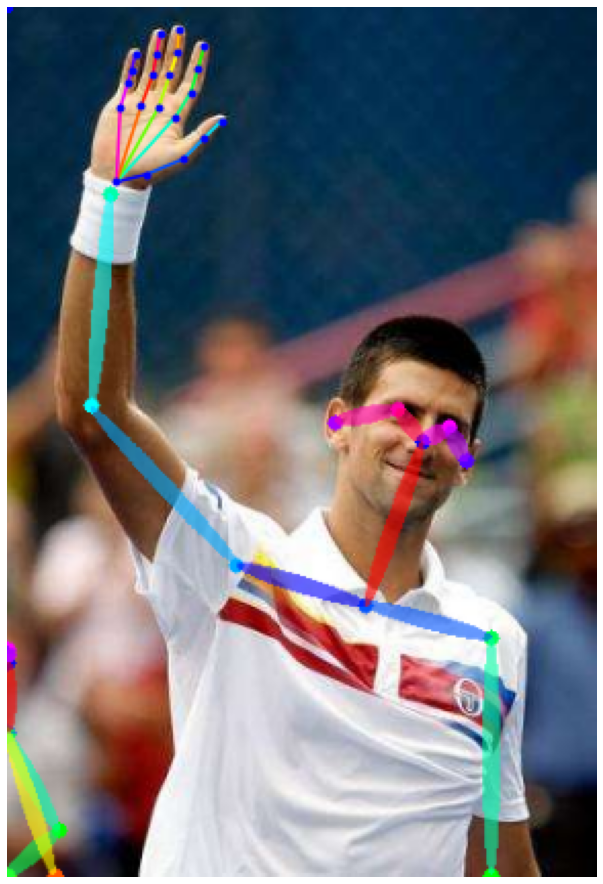

In [45]:
oriImg = cv2.imread(test_image)  # B,G,R order

# estimate body pose and draw
candidate, subset = body_estimation(oriImg)
canvas = copy.deepcopy(oriImg)
canvas = util.draw_bodypose(canvas, candidate, subset)

# estimate hand pose
hands_list = util.handDetect(candidate, subset, oriImg)

all_hand_peaks = []
for x, y, w, is_left in hands_list:
    # cv2.rectangle(canvas, (x, y), (x+w, y+w), (0, 255, 0), 2, lineType=cv2.LINE_AA)
    # cv2.putText(canvas, 'left' if is_left else 'right', (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    # if is_left:
        # plt.imshow(oriImg[y:y+w, x:x+w, :][:, :, [2, 1, 0]])
        # plt.show()
    peaks = hand_estimation(oriImg[y:y+w, x:x+w, :])
    peaks[:, 0] = np.where(peaks[:, 0]==0, peaks[:, 0], peaks[:, 0]+x)
    peaks[:, 1] = np.where(peaks[:, 1]==0, peaks[:, 1], peaks[:, 1]+y)
    # else:
    #     peaks = hand_estimation(cv2.flip(oriImg[y:y+w, x:x+w, :], 1))
    #     peaks[:, 0] = np.where(peaks[:, 0]==0, peaks[:, 0], w-peaks[:, 0]-1+x)
    #     peaks[:, 1] = np.where(peaks[:, 1]==0, peaks[:, 1], peaks[:, 1]+y)
    #     print(peaks)
    all_hand_peaks.append(peaks)

canvas = util.draw_handpose(canvas, all_hand_peaks)

plt.figure(figsize = (20,16))
plt.imshow(canvas[:, :, [2, 1, 0]])
plt.axis('off')
plt.show()

### Detect Pose in Video Frames

extract frames from video:

```
mkdir pose_front
ffmpeg -i pose_front.mov pose_front/%04d.jpg
mkdir pose_rear
ffmpeg -i pose_rear.mov pose_rear/%04d.jpg
```

In [46]:
def detect(test_image):
    oriImg = None
    oriImg = cv2.imread(test_image)  # B,G,R order

    # estimate body pose and draw
    candidate, subset = body_estimation(oriImg)
    canvas = copy.deepcopy(oriImg)
    canvas = util.draw_bodypose(canvas, candidate, subset)

    # estimate hand pose
    hands_list = util.handDetect(candidate, subset, oriImg)

    all_hand_peaks = []
    for x, y, w, is_left in hands_list:
        # cv2.rectangle(canvas, (x, y), (x+w, y+w), (0, 255, 0), 2, lineType=cv2.LINE_AA)
        # cv2.putText(canvas, 'left' if is_left else 'right', (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

        # if is_left:
            # plt.imshow(oriImg[y:y+w, x:x+w, :][:, :, [2, 1, 0]])
            # plt.show()
        peaks = hand_estimation(oriImg[y:y+w, x:x+w, :])
        peaks[:, 0] = np.where(peaks[:, 0]==0, peaks[:, 0], peaks[:, 0]+x)
        peaks[:, 1] = np.where(peaks[:, 1]==0, peaks[:, 1], peaks[:, 1]+y)
        # else:
        #     peaks = hand_estimation(cv2.flip(oriImg[y:y+w, x:x+w, :], 1))
        #     peaks[:, 0] = np.where(peaks[:, 0]==0, peaks[:, 0], w-peaks[:, 0]-1+x)
        #     peaks[:, 1] = np.where(peaks[:, 1]==0, peaks[:, 1], peaks[:, 1]+y)
        #     print(peaks)
        all_hand_peaks.append(peaks)

    canvas = util.draw_handpose(canvas, all_hand_peaks)

    # plt.figure(figsize = (20,16))
    # plt.imshow(canvas[:, :, [2, 1, 0]])
    # plt.axis('off')
    # plt.show()

    return canvas[:, :, [2, 1, 0]]

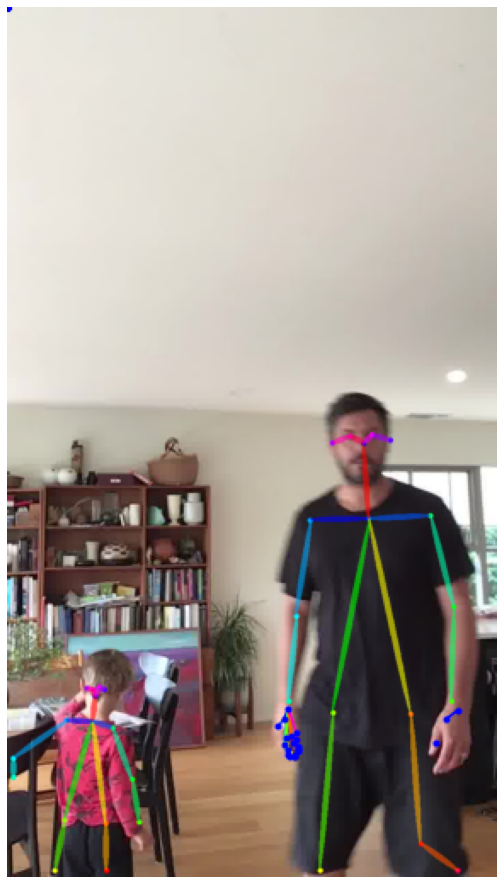

In [47]:
result = detect('images/pose_front/0201.jpg')

plt.figure(figsize = (20,16))
plt.imshow(result)
plt.axis('off')
plt.show()

In [48]:
# result

In [49]:
cv2.imwrite("results/pose_front/0200.jpg", result)

True

loop over images and write to results

NOTE: I had to modify the body.py code in pytorch-openpose to correct a run error. See this thread https://github.com/Hzzone/pytorch-openpose/issues/1

In [52]:
import glob
import os

for frame in glob.glob("images/pose_front/*.jpg"):
    path, basename = os.path.split(frame)
#     print(path, basename)
    result = detect(frame)
    outfile = os.path.join("results/pose_front/", basename)
    rgbimg = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
    cv2.imwrite(outfile, rgbimg)
    print("wrote {}...".format(outfile))

wrote results/pose_front/0001.jpg...
wrote results/pose_front/0002.jpg...
wrote results/pose_front/0003.jpg...
wrote results/pose_front/0004.jpg...
wrote results/pose_front/0005.jpg...
wrote results/pose_front/0006.jpg...
wrote results/pose_front/0007.jpg...
wrote results/pose_front/0008.jpg...
wrote results/pose_front/0009.jpg...
wrote results/pose_front/0010.jpg...
wrote results/pose_front/0011.jpg...
wrote results/pose_front/0012.jpg...
wrote results/pose_front/0013.jpg...
wrote results/pose_front/0014.jpg...
wrote results/pose_front/0015.jpg...
wrote results/pose_front/0016.jpg...
wrote results/pose_front/0017.jpg...
wrote results/pose_front/0018.jpg...
wrote results/pose_front/0019.jpg...
wrote results/pose_front/0020.jpg...
wrote results/pose_front/0021.jpg...
wrote results/pose_front/0022.jpg...
wrote results/pose_front/0023.jpg...
wrote results/pose_front/0024.jpg...
wrote results/pose_front/0025.jpg...
wrote results/pose_front/0026.jpg...
wrote results/pose_front/0027.jpg...
w

write frames to video with ffmpeg:

In [54]:
!ffmpeg -framerate 30 -i results/pose_front/%04d.jpg -c:v libx264 -crf 0 output.mp4

ffmpeg version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --ena

### Detect pose rear perspective

In [ ]:
import glob
import os

for frame in glob.glob("images/pose_rear/*.jpg"):
    path, basename = os.path.split(frame)
#     print(path, basename)
    result = detect(frame)
    outfile = os.path.join("results/pose_rear/", basename)
    rgbimg = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
    cv2.imwrite(outfile, rgbimg)
    print("wrote {}...".format(outfile))

wrote results/pose_rear/0001.jpg...
wrote results/pose_rear/0002.jpg...
wrote results/pose_rear/0003.jpg...
wrote results/pose_rear/0004.jpg...
wrote results/pose_rear/0005.jpg...
wrote results/pose_rear/0006.jpg...
wrote results/pose_rear/0007.jpg...
wrote results/pose_rear/0008.jpg...
wrote results/pose_rear/0009.jpg...
wrote results/pose_rear/0010.jpg...
wrote results/pose_rear/0011.jpg...
wrote results/pose_rear/0012.jpg...
wrote results/pose_rear/0013.jpg...
wrote results/pose_rear/0014.jpg...
wrote results/pose_rear/0015.jpg...
wrote results/pose_rear/0016.jpg...
wrote results/pose_rear/0017.jpg...
wrote results/pose_rear/0018.jpg...
wrote results/pose_rear/0019.jpg...
wrote results/pose_rear/0020.jpg...
wrote results/pose_rear/0021.jpg...


In [ ]:
# write frames to file with ffmpeg
!ffmpeg -framerate 30 -i results/pose_rear/%04d.jpg -c:v libx264 -crf 0 results/detected_pose_rear.mp4

NameError: name 'results' is not defined

another try

wrote results/pose_front/0001.jpg...


ZeroDivisionError: float division by zero